# Description

* raw read quality stats

In [2]:
import os
from IPython.display import Image

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
seqDir = '/var/seq_data/RhizCG/150522_run1_rerun/raw/'

readFile1 = 'read1.fq.gz'
readFile2 = 'read2.fq.gz'
indexReadFile1 = 'index1.fq.gz'
indexReadFile2 = 'index2.fq.gz'

In [6]:
def uncomp(fileName):
    uncompFileName = fileName.rstrip('.gz')
    !cd $seqDir; \
        if [ ! -e $uncompFileName ]; \
        then \
            pigz -k -d -p 24 -f $fileName; \
        fi
    return uncompFileName
    
readFile1 = uncomp(readFile1)
readFile2 = uncomp(readFile2)

In [7]:
def qualStats(sourceDir, fileName):
    outFile = fileName + '_qualStats'
    !cd $sourceDir; \
        fastx_quality_stats -i $fileName -o $outFile -Q 33
    return outFile
    
qualStatsRes1 = qualStats(seqDir, readFile1)
qualStatsRes2 = qualStats(seqDir, readFile2)

In [8]:
%%R -i seqDir -i qualStatsRes1 -i qualStatsRes2

setwd(seqDir)

# reading in qual-stats files    
tbl.r1 = read.delim(qualStatsRes1, sep='\t')
tbl.r2 = read.delim(qualStatsRes2, sep='\t')
tbl.r1$read = 'read1'
tbl.r2$read = 'read2'
tbl.r12 = rbind(tbl.r1, tbl.r2)
rownames(tbl.r12) = 1:nrow(tbl.r12)

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


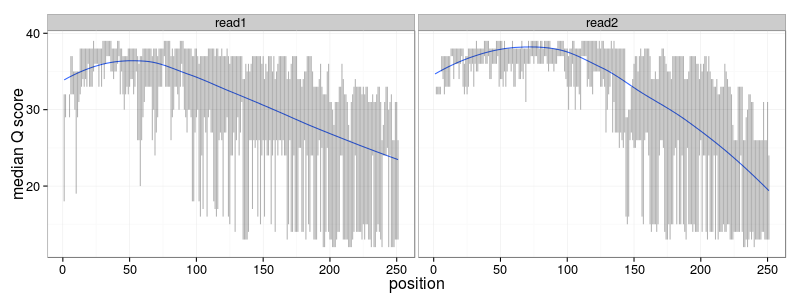

In [9]:
%%R -w 800 -h 300
# smooth curve on median qual values
ggplot(tbl.r12, aes(x=column, y=med, ymin=Q1, ymax=Q3)) +
    geom_smooth(se=FALSE) +
    geom_linerange(alpha=0.3) +
    facet_grid(. ~ read) +
    labs(x='position', y='median Q score') +
    theme_bw() +
    theme( text = element_text(size=16) )

# Index reads

In [13]:
indexReadFile1 = uncomp(indexReadFile1)
indexReadFile2 = uncomp(indexReadFile2)

In [14]:
qualStatsIR1 = qualStats(seqDir, indexReadFile1)
qualStatsIR2 = qualStats(seqDir, indexReadFile2)

In [15]:
%%R -i seqDir -i qualStatsIR1 -i qualStatsIR2

setwd(seqDir)

# reading in qual-stats files    
tbl.r1 = read.delim(qualStatsIR1, sep='\t')
tbl.r2 = read.delim(qualStatsIR2, sep='\t')
tbl.r1$read = 'index_read1'
tbl.r2$read = 'index_read2'
tbl.r12 = rbind(tbl.r1, tbl.r2)
rownames(tbl.r12) = 1:nrow(tbl.r12)

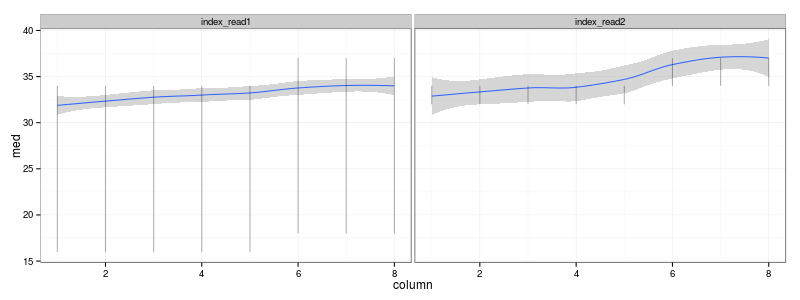

In [16]:
%%R -w 800 -h 300
# smooth curve on median qual values
ggplot(tbl.r12, aes(x=column, y=med, ymin=Q1, ymax=Q3)) +
    geom_smooth(method='loess') +
    geom_linerange(alpha=0.3) +
    facet_grid(. ~ read) +
    theme_bw()